<a href="https://colab.research.google.com/github/Mahiliny23/Handwritten-Digit-Recognition/blob/main/Image_Classification_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
#Load data
imageset = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = imageset.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:" ,x_train.shape)
print("y_train.shape:" ,y_train.shape)
print("x_test.shape:" ,x_test.shape)
print("y_test.shape:" ,y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


In [3]:
#build model
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
#compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
#train the model
r = model.fit(x_train, y_train, batch_size=32, validation_data=(x_test, y_test), epochs=10, )

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2948 - accuracy: 0.9149 - val_loss: 0.1416 - val_accuracy: 0.9578
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1444 - accuracy: 0.9578 - val_loss: 0.1030 - val_accuracy: 0.9700
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1085 - accuracy: 0.9671 - val_loss: 0.0905 - val_accuracy: 0.9719
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0899 - accuracy: 0.9721 - val_loss: 0.0784 - val_accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0768 - accuracy: 0.9757 - val_loss: 0.0782 - val_accuracy: 0.9757
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0664 - accuracy: 0.9800 - val_loss: 0.0765 - val_accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0613 - accuracy: 0.9797 - val_loss: 0.0746 - val_accurac

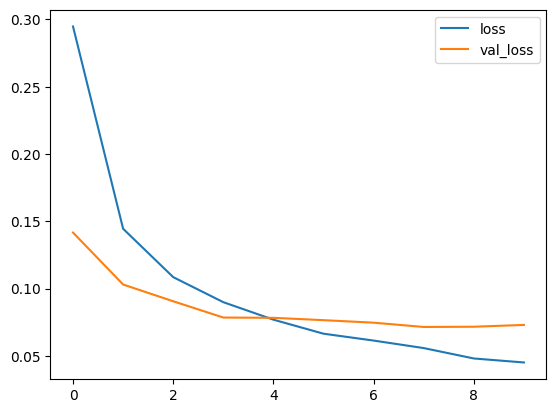

In [6]:
#plot loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

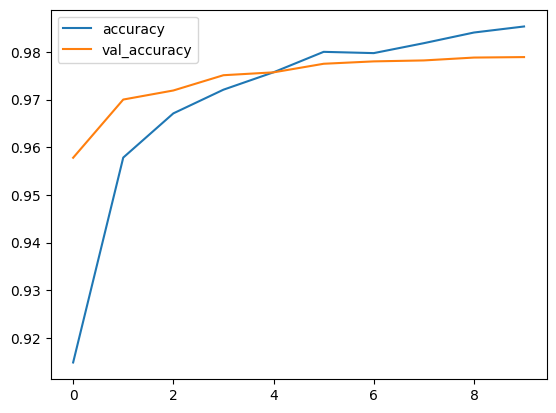

In [7]:
#plot accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [8]:
#evaluate model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0729 - accuracy: 0.9789
[0.07293857634067535, 0.9789000153541565]


313/313 [==============================] - 1s 2ms/step
[[ 972    0    1    1    1    1    2    1    1    0]
 [   0 1122    4    2    0    2    1    1    3    0]
 [   4    1 1008    4    3    1    1    6    4    0]
 [   1    0    8  981    0    8    0    7    2    3]
 [   1    0    3    0  964    0    2    2    2    8]
 [   2    0    0    4    1  874    3    2    4    2]
 [   5    3    1    0    4    3  940    0    2    0]
 [   0    2    7    1    0    0    0 1014    1    3]
 [   4    0    6    5    4    6    1    5  939    4]
 [   2    4    0    6    9    1    1   11    0  975]]
Confusion matrix, without normalisation
[[ 972    0    1    1    1    1    2    1    1    0]
 [   0 1122    4    2    0    2    1    1    3    0]
 [   4    1 1008    4    3    1    1    6    4    0]
 [   1    0    8  981    0    8    0    7    2    3]
 [   1    0    3    0  964    0    2    2    2    8]
 [   2    0    0    4    1  874    3    2    4    2]
 [   5    3    1    0    4    3  940    0    2    0]
 [ 

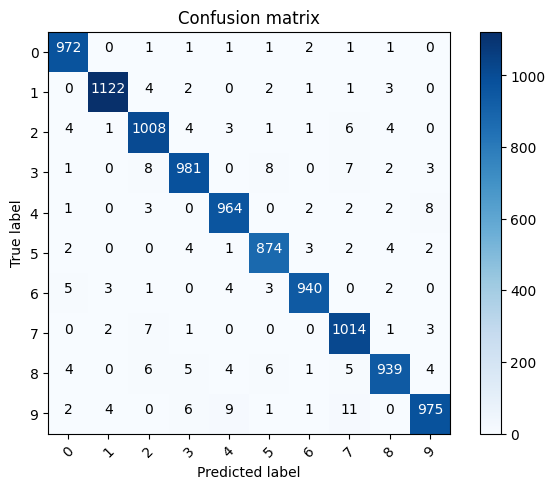

In [9]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalised confusion matrix")
  else:
    print("Confusion matrix, without normalisation")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt),
        horizontalalignment='center',
        color="white" if cm[i, j] > thresh else "black")




p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
print(cm)

plot_confusion_matrix(cm, list(range(10)))
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Text(0.5, 1.0, ' True label:[9] Predicted: [7]')

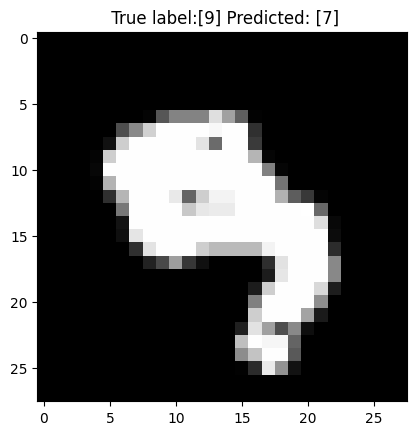

In [10]:
#misclassified examples
misclassified_ex = np.where (p_test != y_test) [0]
i = np.random.choice(misclassified_ex)
plt.imshow(x_test[i], cmap='gray')
plt.title(" True label:%s Predicted: %s" % ([y_test[i]], [p_test[i]]))